# 2D Heat Conduction FDM Python Implementation

## Step 0: import essential packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

## Step 1: initialization
Setup some essential variables like boundary and initial temperature, $xy$ grid, and shape of boundary.

In [2]:
# initialization
T  = 400.00   # environment temperature
T0 = 298.15   # initial temperature
alpha = 1.0   # rate of diffussion
t0 = 0.0      # start time
tf = 10.0     # stop time
dt = 0.01     # difference in time
dx = 0.2      # grid resolution for x
dy = 0.2      # grid resolution for y
x_min = 0.0   # x range
y_min = 0.0   #
x_max = 10.0  # y range
y_max = 10.0  # 
nx = int((x_max-x_min)/dx) + 1
ny = int((y_max-y_min)/dy) + 1
nt = int((tf - t0)/dt)
x = np.linspace(x_min, x_max, nx)
y = np.linspace(y_min, y_max, ny)
yv, xv = np.meshgrid(y, x)
u = np.ones(xv.shape) * T0 # mesh of temperature
U = np.zeros([nx, ny, nt+1])

# boundary condition
# temperatures on (and out of) the boundary of mesh
# should constantly equal to T
# define boundary as a circle
bound = []
no_bound = []
cx, cy = 5.0, 5.0 # center of circle
r      = 4.0      # radius of circle
for i in range(nx):
    for j in range(ny):
        # circle boundary
        if (x[i]-cx)**2 + (y[j]-cy)**2 >= r**2:
            bound.append([i, j])
            u[i, j] = T
        else:
            no_bound.append([i, j])

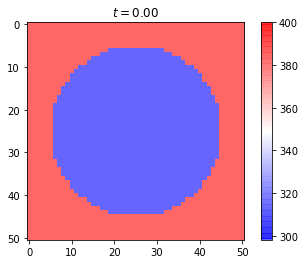

In [3]:
# display the initial condition
plt.imshow(u, cmap="bwr", vmin=min(T, T0), vmax=max(T, T0), alpha=0.6)
plt.title("$t = {:.2f}$".format(t0))
plt.colorbar()

## Step 2: define Laplician function

In [4]:
def laplacian(f, i, j, dx, dy):
    f_ddx = f[i+1, j] - 2*f[i, j] + f[i-1, j]
    f_ddy = f[i, j+1] - 2*f[i, j] + f[i, j-1]
    return f_ddx/dx**2 + f_ddy/dy**2

## Step 3: main program

In [5]:
U[:, :, 0] = np.copy(u[:, :])
for t in range(nt):
    U[:, :, t+1] = np.copy(U[:, :, t])
    for (i, j) in no_bound:
        U[i, j, t+1] = U[i, j, t] + dt*alpha*laplacian(U[:, :, t], i, j, dx, dy)

## Step 4: generate animation

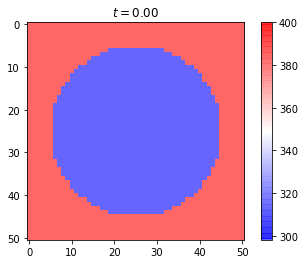

In [6]:
anime_idx = np.arange(0, nt+1, 50)
fig, ax = plt.subplots()
plot = ax.imshow(U[:, :, 0], cmap="bwr", vmin=min(T, T0), vmax=max(T, T0), alpha=0.6)
fig.colorbar(plot)
def update(frame):
    ax.cla() # clear imshow figure
    plot = ax.imshow(U[:, :, frame], cmap="bwr", vmin=min(T, T0), vmax=max(T, T0), alpha=0.6)
    ax.set_title("$t = {:.2f}$".format(frame*dt+t0))
ani = FuncAnimation(fig, update, frames=anime_idx)
ani.save('heat_conduct.gif',writer='imagemagick')